Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data


### Importing all the important libraries

In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from glob import glob
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam

In [2]:
## importing drive
from google.colab import drive
drive.mount("/content/gdrive")

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

Mounted at /content/gdrive


This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [3]:
os.getcwd()

'/content'

In [4]:
## setting directory

os.chdir('/content/gdrive/My Drive/Machine Learning Journey/Git_Projects/Melonoma_Detection/Skin cancer ISIC The International Skin Imaging Collaboration/')
os.getcwd()

'/content/gdrive/My Drive/Machine Learning Journey/Git_Projects/Melonoma_Detection/Skin cancer ISIC The International Skin Imaging Collaboration'

In [5]:
# Defining the path for train and test images
data_dir_train = pathlib.Path("Train/")
data_dir_test = pathlib.Path("Test/")

In [6]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg'))) #count of images
image_class_train = len(list(data_dir_train.glob('*'))) #count of folders (categories/classes)
print(f'number of train images is {image_count_train} in {image_class_train} classes \n')
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(f'number of test images is {image_count_test}')

number of train images is 2239 in 9 classes 

number of test images is 118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [7]:
batch_size = 32
img_height = 180
img_width = 180

seed = 123

Use 80% of the images for training, and 20% for validation.

In [8]:
## training dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train, label_mode='categorical', batch_size=batch_size,
                                                               image_size=(img_height, img_width), color_mode='rgb', validation_split=0.2,
                                                               subset='training', seed = seed)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [9]:
## validation dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train, label_mode='categorical', batch_size=batch_size,
                                                               image_size=(img_height, img_width), color_mode='rgb', validation_split=0.2,
                                                               subset='validation', seed = seed)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [10]:
## list of skin conditions and cancers
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data

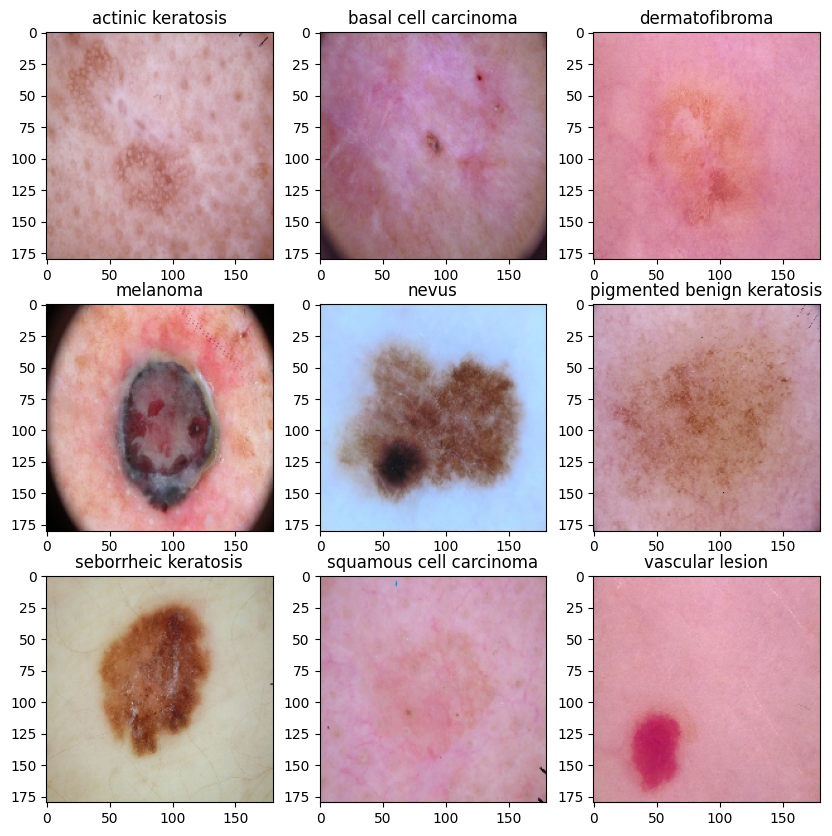

In [11]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img

#Dictionary to store the path of image as per the class
files_path_dict = {}

for name in class_names:
    files_path_dict[name] = list(map(lambda x:str(data_dir_train)+'/'+name+'/'+x,os.listdir(str(data_dir_train)+'/'+name)))


#Visualize image
plt.figure(figsize=(10,10))
index = 0
for name in class_names:
    path_list = files_path_dict[name][:1]
    index += 1
    plt.subplot(3,3,index)
    plt.imshow(load_img(path_list[0],target_size=(img_height,img_width)))
    plt.title(name)

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [12]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Creation of Model 1


In [13]:
### model building code

channels = 3  ## number of channels RGB
input_shape = (img_height,img_width, channels)  ## shape of input is 180x180x3 tensor


In [14]:
model1 = Sequential(name="model_1")

##input layer
model1.add(layers.experimental.preprocessing.Rescaling(1.0/255, input_shape=input_shape))  ##input layer with rescaled inputs

##layer 1
model1.add(layers.Conv2D(32, kernel_size=(3,3), activation='relu')) ## 32 filters of 3x3 with 0 padding w/ relu activation
model1.add(layers.MaxPooling2D((2, 2)))

##layer 2
model1.add(layers.Conv2D(64, kernel_size=(3,3), activation='relu')) ## 32 filters of 3x3 with 0 padding w/ relu activation
model1.add(layers.MaxPooling2D((2, 2)))

##layer 3
model1.add(layers.Conv2D(128, kernel_size=(3,3), activation='relu')) ## 32 filters of 3x3 with 0 padding w/ relu activation
model1.add(layers.MaxPooling2D((2, 2)))

##layer 3
model1.add(layers.Conv2D(256, kernel_size=(3,3), activation='relu')) ## 32 filters of 3x3 with 0 padding w/ relu activation
model1.add(layers.MaxPooling2D((2, 2)))

##layer 3
model1.add(layers.Conv2D(512, kernel_size=(3,3), activation='relu')) ## 32 filters of 3x3 with 0 padding w/ relu activation
model1.add(layers.MaxPooling2D((2, 2)))

##layer 4
model1.add(layers.Flatten())


#output layer
model1.add(layers.Dense(image_class_train, activation='softmax'))




### Compile the model

In [15]:
## selection of optimizer and loss function

adam = Adam(amsgrad=True)

model1.compile(optimizer=adam,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [16]:
# View the summary of all layers
model1.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 89, 89, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 41, 41, 128)       7385

### Train the model

In [17]:
epochs = 20

history = model1.fit(
  train_ds,
  validation_data=val_ds,
  batch_size=batch_size,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 166s 589ms/step - loss: 2.0084 - accuracy: 0.2015 - val_loss: 1.8785 - val_accuracy: 0.3043
Epoch 2/20
56/56 [==============================] - 2s 37ms/step - loss: 1.7520 - accuracy: 0.3387 - val_loss: 1.9080 - val_accuracy: 0.3400
Epoch 3/20
56/56 [==============================] - 2s 37ms/step - loss: 1.7089 - accuracy: 0.3795 - val_loss: 1.6803 - val_accuracy: 0.4027
Epoch 4/20
56/56 [==============================] - 2s 37ms/step - loss: 1.5996 - accuracy: 0.4174 - val_loss: 1.4785 - val_accuracy: 0.4877
Epoch 5/20
56/56 [==============================] - 2s 37ms/step - loss: 1.5361 - accuracy: 0.4470 - val_loss: 1.4660 - val_accuracy: 0.5078
Epoch 6/20
56/56 [==============================] - 2s 37ms/step - loss: 1.4366 - accuracy: 0.4927 - val_loss: 1.4481 - val_accuracy: 0.4944
Epoch 7/20
56/56 [==============================] - 2s 37ms/step - loss: 1.4053 - accuracy: 0.4994 - val_loss: 1.3800 - val_accuracy: 0.5302
Epoch 8/20

### Visualizing training results

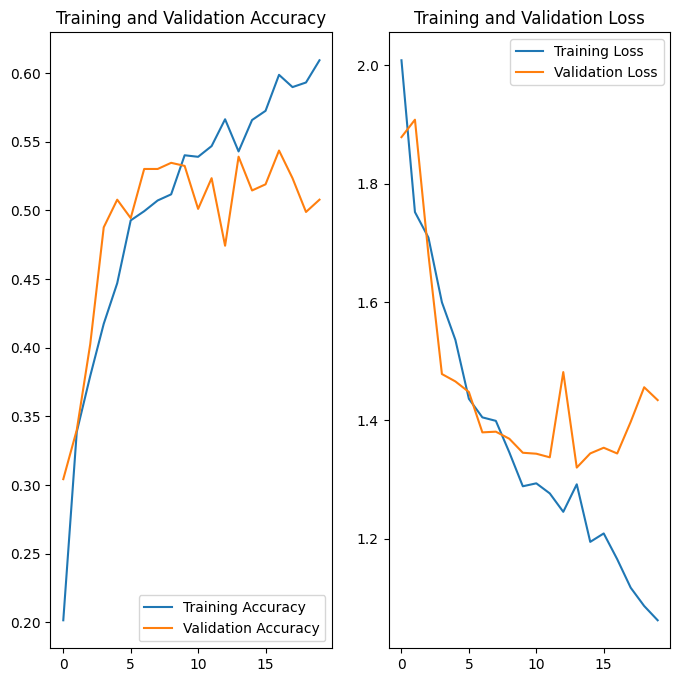

In [18]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

There is evidence of overfitting after the 8 or so epoach as validation loss and accuracy plateau compared to training. It would seem the model is primarily learning the pattern of the training data and not the general pattern.

Additionally, the model likely would need more epochs of training to improve overall accuracy. My goal with this model is to build a lightweight model that does a decent job of classification. While it would not be usefulf or making medical diagnoses, it could be useful in highlight lesions of interest to an individual.

To attempt to handle the overfitting, I will try data augmentation and drop outs.

### Data Augmentation

https://www.datacamp.com/tutorial/complete-guide-data-augmentation

Using the above as a guide, I will opt to flip the images randomly, since cancers can come in numerous shapes, it be be also useful to conduct other rotations on the images, additionally

In [19]:
## Augmentation strategy

data_augmentation = Sequential([
    layers.RandomFlip("horizontal_and_vertical", seed=seed), ## randomly flip horizontally and vertically
    layers.RandomRotation(0.2, seed=seed), ## random roation of between -20% * 2pi, 20%*2pi - basically 0.2*360 degree rotations
    layers.RandomTranslation(height_factor=(-0.1, 0.1),width_factor=(-0.1, 0.1)), ## moving images randomly left or right
    layers.RandomZoom(height_factor=0.1, width_factor=0.1) ##zoom on the height out by 10%, same for width
])

rescaler = Sequential([
    layers.experimental.preprocessing.Rescaling(1.0/255)
    ])

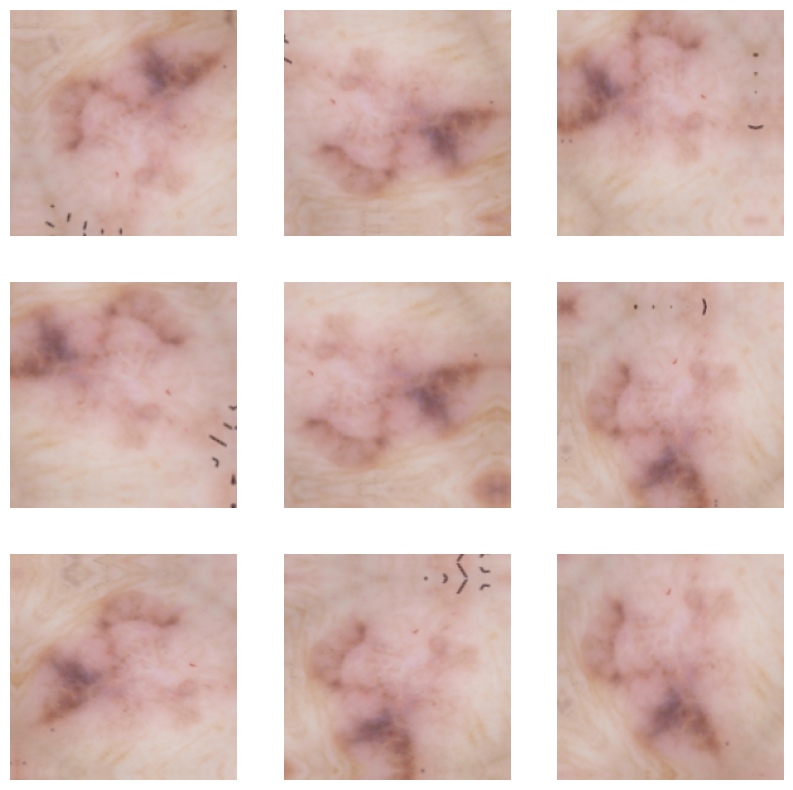

In [20]:
## visualisation augmentation
plt.figure(figsize=(10,10))

for image_batch, label_batch in train_ds.take(1):  #take one image from a one category in the training set
  for i in range(9): #number of images
    augmented_image = data_augmentation(image_batch) #image to augment
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_image[0].numpy().astype(int)) ## only ints, not floats can be displayed
    plt.axis("off")

### Model 2: Augmented Data and Dropout


In [21]:
model2 = Sequential(name="model_2")

##input layer
model2.add(layers.InputLayer(input_shape=input_shape))
model2.add(data_augmentation)
model2.add(rescaler)

##layer 1
model2.add(layers.Conv2D(32, kernel_size=(3,3), activation='relu')) ## 32 filters of 3x3 with 0 padding w/ relu activation
model2.add(layers.MaxPooling2D((2, 2)))

##layer 2
model2.add(layers.Conv2D(64, kernel_size=(3,3), activation='relu')) ## 32 filters of 3x3 with 0 padding w/ relu activation
model2.add(layers.MaxPooling2D((2, 2)))

##layer 3
model2.add(layers.Conv2D(128, kernel_size=(3,3), activation='relu')) ## 32 filters of 3x3 with 0 padding w/ relu activation
model2.add(layers.MaxPooling2D((2, 2)))

##layer 3
model2.add(layers.Conv2D(256, kernel_size=(3,3), activation='relu')) ## 32 filters of 3x3 with 0 padding w/ relu activation
model2.add(layers.MaxPooling2D((2, 2)))

##layer 3
model2.add(layers.Conv2D(512, kernel_size=(3,3), activation='relu')) ## 32 filters of 3x3 with 0 padding w/ relu activation
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Dropout(0.5))

##layer 4
model2.add(layers.Flatten())


#output layer
model2.add(layers.Dense(image_class_train, activation='softmax'))





### Compiling the model

In [22]:
#for some reason i need to make this opt variable again

adam2 = Adam(amsgrad=True)

model2.compile(optimizer=adam2,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [23]:
# View the summary of all layers
model2.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 180, 180, 3)       0         
                                                                 
 sequential_1 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 conv2d_5 (Conv2D)           (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 89, 89, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                       

### Training the model

In [24]:
epochs = 20

history = model2.fit(
  train_ds,
  validation_data=val_ds,
  batch_size=batch_size,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 7s 64ms/step - loss: 1.9553 - accuracy: 0.2533 - val_loss: 1.8094 - val_accuracy: 0.2931
Epoch 2/20
56/56 [==============================] - 3s 60ms/step - loss: 1.8033 - accuracy: 0.3131 - val_loss: 1.8499 - val_accuracy: 0.3758
Epoch 3/20
56/56 [==============================] - 3s 59ms/step - loss: 1.6881 - accuracy: 0.3616 - val_loss: 1.6316 - val_accuracy: 0.4072
Epoch 4/20
56/56 [==============================] - 3s 58ms/step - loss: 1.5629 - accuracy: 0.4263 - val_loss: 1.5976 - val_accuracy: 0.4340
Epoch 5/20
56/56 [==============================] - 3s 59ms/step - loss: 1.5163 - accuracy: 0.4353 - val_loss: 1.5196 - val_accuracy: 0.4631
Epoch 6/20
56/56 [==============================] - 3s 59ms/step - loss: 1.4765 - accuracy: 0.4593 - val_loss: 1.5725 - val_accuracy: 0.4765
Epoch 7/20
56/56 [==============================] - 3s 57ms/step - loss: 1.4876 - accuracy: 0.4593 - val_loss: 1.5003 - val_accuracy: 0.4944
Epoch 8/20
56

### Visualizing the results

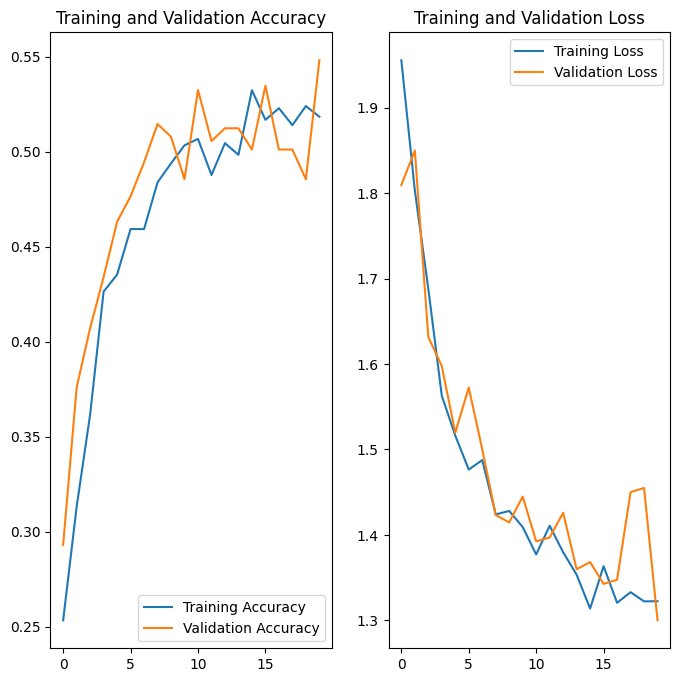

In [25]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

- overfitting appears greatly reduced as the loss function results for validation and training sets follow the same trend with similar results. Additionally as training accuracy begins to stall, validation accuracy does as well.

- having run the model with dropouts and no augmentation before, it appears that the drop out is primarily responsible for the reduction in overfitting for most epochs. However, without augmentation, as the model continues to learn and the number of epochs increased, validation loss and accuracy stalled while training continued to decrease and increase respectively. This indicates that the model is still memorising the training set when augmentation is not present, havign dropouts simply delays this.

For better learning, the dataset may need to be rebalanced and/or further augmented

#### Class distributions

In [26]:
## evaluaion the number of instances in each class.

def class_distributions(directory):
    sub_directories = list(pathlib.Path(directory).glob('*')) #list of all subdirectories of Train

    counts = [len(list(path.glob('*'))) for path in sub_directories] #count the number of images in each subdirectory
    class_names = [path.name for path in sub_directories] #names of each subdirectory - class names

    dataframe_of_classes = pd.DataFrame({'Class': class_names, 'No. of Image': counts})  #dataframe of paths and classes

    return dataframe_of_classes



distributions = class_distributions(data_dir_train)

distributions



,Class,No. of Image
0,actinic keratosis,114
1,basal cell carcinoma,376
2,dermatofibroma,95
3,melanoma,438
4,nevus,357
5,pigmented benign keratosis,462
6,seborrheic keratosis,77
7,squamous cell carcinoma,181
8,vascular lesion,139


- there are clear class imbalances here.

- melanoma takes the cake with 438 sample images while seborrheic keratosis has the least with 77

- especially in this case, these imbalances are likely hindrances to learning. Some conditions, to the human eye appear similar therefore findinng the general pattern for those illnesses that distinguish them from others may be difficult for the model hence the original issues with overfitting, the model was simply forced top learn th training set in an attempt to compensate for the lack of samples.


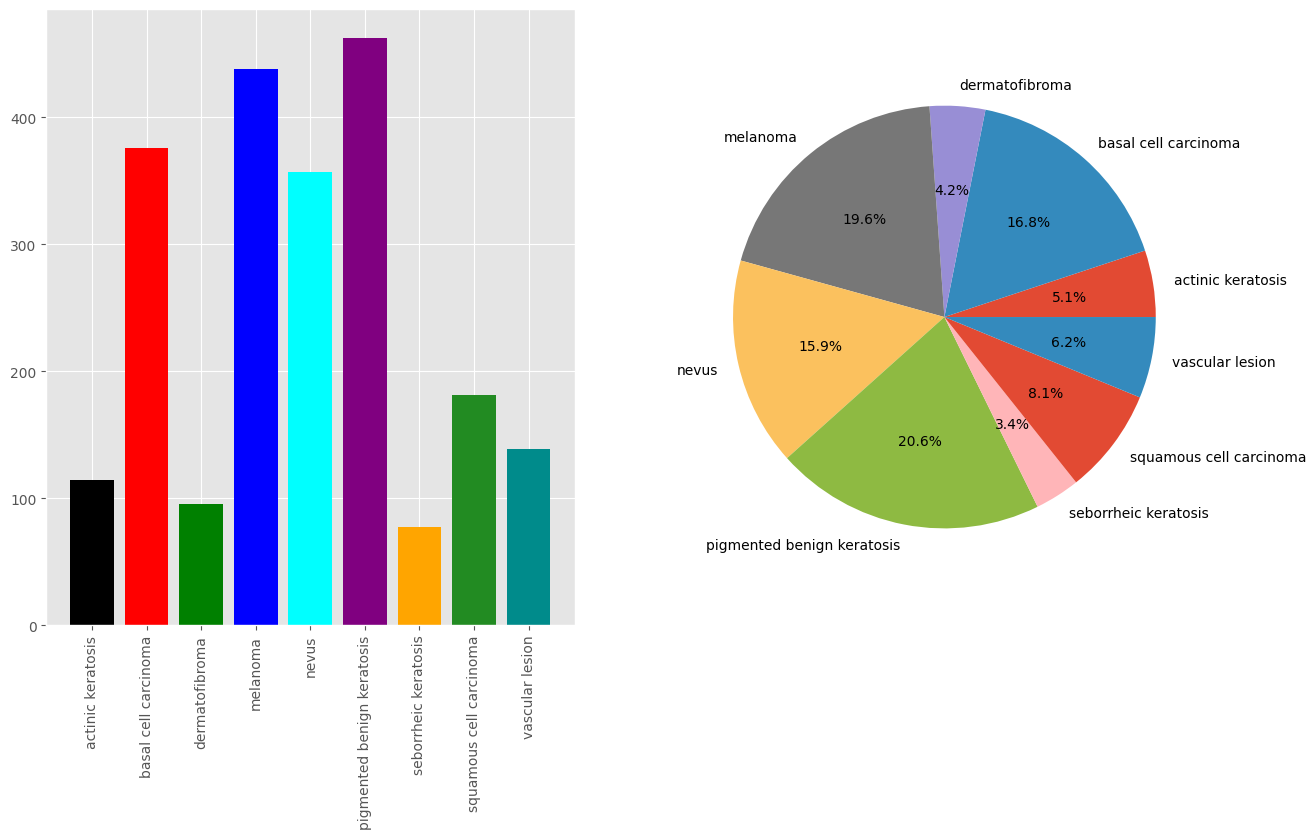

In [27]:
##visualise the imbalance with a barplot and pie chart

plt.figure(figsize=(15, 8))
plt.style.use("ggplot")

plt.subplot(1,2,1)
plt.bar(distributions['Class'], distributions['No. of Image'],
        color=['black', 'red', 'green', 'blue', 'cyan', 'purple', 'orange', 'forestgreen','darkcyan'])
plt.xticks(rotation = 90)

plt.subplot(1,2,2)
plt.pie(distributions['No. of Image'], labels = distributions['Class'], autopct='%1.1f%%')

plt.show()


#### **Rectifying class imbalances**
#### **Context:** a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) can be used to add more samples across all classes so that none of the classes have very few samples.

In [28]:
%%capture
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [29]:
os.getcwd()

'/content/gdrive/MyDrive/Machine Learning Journey/Git_Projects/Melonoma_Detection/Skin cancer ISIC The International Skin Imaging Collaboration'

In [30]:

## We are adding 500 samples per class to make sure that none of the classes are sparse.

path_to_training_dataset="Train/"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500)

Initialised with 114 image(s) found.
Output directory set to Train/actinic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F3F7830B670>: 100%|██████████| 500/500 [00:12<00:00, 39.03 Samples/s]


Initialised with 376 image(s) found.
Output directory set to Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F400C0E2AD0>: 100%|██████████| 500/500 [00:13<00:00, 36.83 Samples/s]


Initialised with 95 image(s) found.
Output directory set to Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F400171BBE0>: 100%|██████████| 500/500 [00:11<00:00, 44.00 Samples/s]


Initialised with 438 image(s) found.
Output directory set to Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=767x576 at 0x7F401C2876D0>: 100%|██████████| 500/500 [00:50<00:00,  9.84 Samples/s]


Initialised with 357 image(s) found.
Output directory set to Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=919x802 at 0x7F401C412560>: 100%|██████████| 500/500 [00:42<00:00, 11.80 Samples/s]


Initialised with 462 image(s) found.
Output directory set to Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F4000250C40>: 100%|██████████| 500/500 [00:11<00:00, 45.02 Samples/s]


Initialised with 77 image(s) found.
Output directory set to Train/seborrheic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x7F3F7830A860>: 100%|██████████| 500/500 [00:25<00:00, 19.82 Samples/s]


Initialised with 181 image(s) found.
Output directory set to Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F3F78413F10>: 100%|██████████| 500/500 [00:10<00:00, 47.85 Samples/s]


Initialised with 139 image(s) found.
Output directory set to Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F401C286FB0>: 100%|██████████| 500/500 [00:11<00:00, 45.02 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [31]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [32]:
path_list = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))] ## loop through each class subfolder called output where new images are stored
path_list[3999]

'Train/squamous cell carcinoma/output/squamous cell carcinoma_original_ISIC_0028795.jpg_8f3b89c3-29e7-4aa7-8949-ecb841bb390e.jpg'

In [33]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new[1999:2000]  #taking a look at the 2000th

['melanoma']

In [34]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new)) ##dictionary of paths and classes


In [35]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label']) ## dataframe of above dictionary

In [36]:
df2['Label'].value_counts() ## count of the new images per class

actinic keratosis             500
basal cell carcinoma          500
dermatofibroma                500
melanoma                      500
nevus                         500
pigmented benign keratosis    500
seborrheic keratosis          500
squamous cell carcinoma       500
vascular lesion               500
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### Training using augmented data

In [37]:
batch_size = 32
img_height = 180
img_width = 180

In [38]:
os.getcwd()

'/content/gdrive/MyDrive/Machine Learning Journey/Git_Projects/Melonoma_Detection/Skin cancer ISIC The International Skin Imaging Collaboration'

#### new train dataset


In [39]:
data_dir_train="Train/"
train_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train, label_mode='categorical', batch_size=batch_size,
                                                               image_size=(img_height, img_width), color_mode='rgb', validation_split=0.2,
                                                               subset='training', seed = seed)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### new validation dataset

In [40]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train, label_mode='categorical', batch_size=batch_size,
                                                               image_size=(img_height, img_width), color_mode='rgb', validation_split=0.2,
                                                               subset='validation', seed = seed)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


#### Model 3 inclusive of batch normalisation

In [47]:
## model 3 code
model3 = Sequential(name="model_3")

##input layer
model3.add(layers.InputLayer(input_shape=input_shape))
model3.add(data_augmentation)
model3.add(rescaler)

##layer 1 1
model3.add(layers.Conv2D(32, kernel_size=(3,3), activation='relu')) ## 32 filters of 3x3 with 0 padding w/ relu activation
model3.add(layers.MaxPooling2D((2, 2)))

model3.add(layers.BatchNormalization())

##layer 2
model3.add(layers.Conv2D(64, kernel_size=(3,3), activation='relu')) ## 32 filters of 3x3 with 0 padding w/ relu activation
model3.add(layers.MaxPooling2D((2, 2)))


model3.add(layers.BatchNormalization())

##layer 3
model3.add(layers.Conv2D(128, kernel_size=(3,3), activation='relu')) ## 32 filters of 3x3 with 0 padding w/ relu activation
model3.add(layers.MaxPooling2D((2, 2)))

model3.add(layers.BatchNormalization())

##layer 3
model3.add(layers.Conv2D(256, kernel_size=(3,3), activation='relu')) ## 32 filters of 3x3 with 0 padding w/ relu activation
model3.add(layers.MaxPooling2D((2, 2)))

model3.add(layers.BatchNormalization())

##layer 3
model3.add(layers.Conv2D(512, kernel_size=(3,3), activation='relu')) ## 32 filters of 3x3 with 0 padding w/ relu activation
model3.add(layers.MaxPooling2D((2, 2)))

model3.add(layers.BatchNormalization())

model3.add(layers.Dropout(0.5))


##layer 4
model3.add(layers.Flatten())


#output layer
model3.add(layers.Dense(image_class_train, activation='softmax'))




#### Model Compilation

In [48]:
## compile with adam and cross entropy

adam3 = Adam(amsgrad=True)
model3.compile(optimizer=adam3,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [49]:
# View the summary of all layers
model3.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 180, 180, 3)       0         
                                                                 
 sequential_1 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 conv2d_15 (Conv2D)          (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 89, 89, 32)       0         
 g2D)                                                            
                                                                 
 batch_normalization_1 (Batc  (None, 89, 89, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_16 (Conv2D)          (None, 87, 87, 64)        1849

#### Model Training

In [50]:
## fitting with 50 epochs
epochs = 50

history = model3.fit(
  train_ds,
  validation_data=val_ds,
  batch_size=batch_size,
  epochs=epochs
)


Epoch 1/50
169/169 [==============================] - 26s 128ms/step - loss: 1.7144 - accuracy: 0.3550 - val_loss: 2.2184 - val_accuracy: 0.1151
Epoch 2/50
169/169 [==============================] - 23s 130ms/step - loss: 1.5670 - accuracy: 0.4084 - val_loss: 2.3151 - val_accuracy: 0.1648
Epoch 3/50
169/169 [==============================] - 23s 133ms/step - loss: 1.4672 - accuracy: 0.4260 - val_loss: 2.0946 - val_accuracy: 0.2621
Epoch 4/50
169/169 [==============================] - 23s 131ms/step - loss: 1.4400 - accuracy: 0.4549 - val_loss: 1.7645 - val_accuracy: 0.3846
Epoch 5/50
169/169 [==============================] - 23s 131ms/step - loss: 1.4152 - accuracy: 0.4596 - val_loss: 1.3319 - val_accuracy: 0.5041
Epoch 6/50
169/169 [==============================] - 25s 143ms/step - loss: 1.3521 - accuracy: 0.4876 - val_loss: 1.5348 - val_accuracy: 0.4625
Epoch 7/50
169/169 [==============================] - 24s 137ms/step - loss: 1.3045 - accuracy: 0.4933 - val_loss: 1.4060 - val_ac

#### Visualize the model results

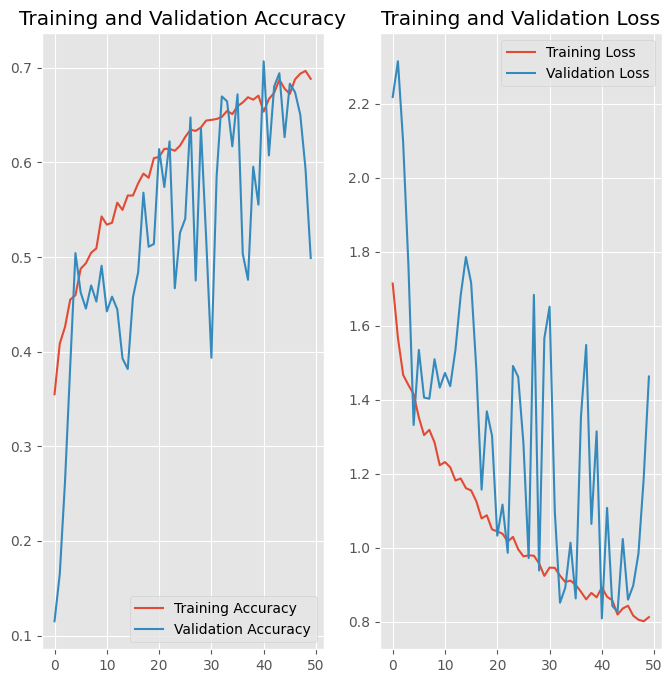

In [51]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Performance with batch normalisation is quite unstable. While there is a clear trend in the right direction with the augmentation and rebalancing, when batch normalisation is added, the validation loss and accuracy fluctuate wildly.

It would seem that while batch normalisation can help models to converge, it is not always needed or useful.

I will rerun the model again but this time for longer without batch normalisation and compare to this model



#### Model 4 without batch normalisation

In [61]:
## model 4 code
model4 = Sequential(name="model_4")

##input layer
model4.add(layers.InputLayer(input_shape=input_shape))
model4.add(data_augmentation)
model4.add(rescaler)

##layer 1
model4.add(layers.Conv2D(32, kernel_size=(3,3), activation='relu')) ## 32 filters of 3x3 w/ relu activation
model4.add(layers.MaxPooling2D((2, 2)))


##layer 2
model4.add(layers.Conv2D(64, kernel_size=(3,3), activation='relu')) ## 64 filters of 3x3 w/ relu activation
model4.add(layers.MaxPooling2D((2, 2)))


##layer 3
model4.add(layers.Conv2D(128, kernel_size=(3,3), activation='relu')) ## 128 filters of 3x3 w/ relu activation
model4.add(layers.MaxPooling2D((2, 2)))

##layer 4
model4.add(layers.Conv2D(256, kernel_size=(3,3), activation='relu')) ## 256 filters of 3x3 w/ relu activation
model4.add(layers.MaxPooling2D((2, 2)))


##layer 5
model4.add(layers.Conv2D(512, kernel_size=(3,3), activation='relu')) ## 512 filters of 3x3 w/ relu activation
model4.add(layers.MaxPooling2D((2, 2)))

model4.add(layers.Dropout(0.5))


##layer 6
model4.add(layers.Flatten())


#output layer
model4.add(layers.Dense(image_class_train, activation='softmax'))


In [65]:
# compile model
adam4 = Adam(amsgrad=True)
model4.compile(optimizer=adam4,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# View the summary of all layers
model4.summary()


Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 180, 180, 3)       0         
                                                                 
 sequential_1 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 conv2d_30 (Conv2D)          (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 89, 89, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_31 (Conv2D)          (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_31 (MaxPoolin  (None, 43, 43, 64)       0         
 g2D)                                                      

In [63]:
## fitting with 50 epochs
epochs = 70

history = model4.fit(
  train_ds,
  validation_data=val_ds,
  batch_size=batch_size,
  epochs=epochs,
)

Epoch 1/70
169/169 [==============================] - 26s 131ms/step - loss: 2.0840 - accuracy: 0.1881 - val_loss: 1.8610 - val_accuracy: 0.2584
Epoch 2/70
169/169 [==============================] - 25s 139ms/step - loss: 1.7203 - accuracy: 0.3142 - val_loss: 1.6395 - val_accuracy: 0.3719
Epoch 3/70
169/169 [==============================] - 25s 143ms/step - loss: 1.5843 - accuracy: 0.3759 - val_loss: 1.4714 - val_accuracy: 0.4068
Epoch 4/70
169/169 [==============================] - 25s 140ms/step - loss: 1.5237 - accuracy: 0.4015 - val_loss: 1.5330 - val_accuracy: 0.4239
Epoch 5/70
169/169 [==============================] - 24s 140ms/step - loss: 1.4573 - accuracy: 0.4342 - val_loss: 1.3482 - val_accuracy: 0.4900
Epoch 6/70
169/169 [==============================] - 24s 136ms/step - loss: 1.3991 - accuracy: 0.4557 - val_loss: 1.3042 - val_accuracy: 0.4937
Epoch 7/70
169/169 [==============================] - 25s 140ms/step - loss: 1.4072 - accuracy: 0.4534 - val_loss: 1.4383 - val_ac

#### Visualize the model results

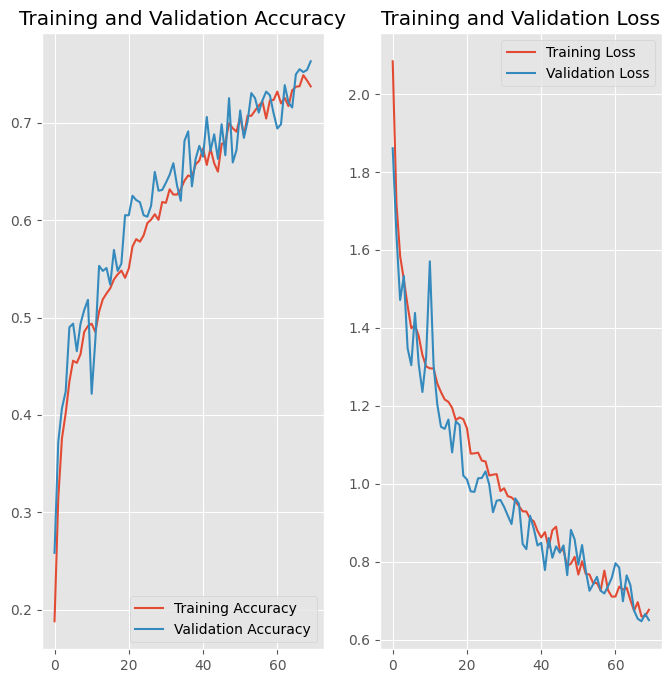

In [64]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Compared to the model 3 with batch normalisation, there is a much more stable decline in the loss and increase in acccuracy with the model 4 without batch normalisation.

It would seem the fluctuations are due solely to batch normalisation in model 3

In [80]:
## model 5 code
model5 = Sequential(name="model_5")

##input layer
model5.add(layers.InputLayer(input_shape=input_shape))
model5.add(data_augmentation)
model5.add(rescaler)

##layer 1
model5.add(layers.Conv2D(32, kernel_size=(3,3), activation='relu')) ## 32 filters of 3x3 w/ relu activation
model5.add(layers.MaxPooling2D((2, 2)))


##layer 2
model5.add(layers.Conv2D(64, kernel_size=(3,3), activation='relu')) ## 64 filters of 3x3 w/ relu activation
model5.add(layers.MaxPooling2D((2, 2)))


##layer 3
model5.add(layers.Conv2D(128, kernel_size=(3,3), activation='relu')) ## 128 filters of 3x3 w/ relu activation
model5.add(layers.MaxPooling2D((2, 2)))

##layer 3
model5.add(layers.Conv2D(256, kernel_size=(3,3), activation='relu')) ## 128 filters of 3x3 w/ relu activation
model5.add(layers.MaxPooling2D((2, 2)))

##layer 3
model5.add(layers.Conv2D(512, kernel_size=(3,3), activation='relu')) ## 128 filters of 3x3 w/ relu activation
model5.add(layers.MaxPooling2D((2, 2)))



model5.add(layers.Dropout(0.5))


##layer 4
model5.add(layers.Flatten())


#output layer
model5.add(layers.Dense(64, activation='relu'))

#output layer
model5.add(layers.Dense(image_class_train, activation='softmax'))


In [81]:
# compile model

model5.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# View the summary of all layers
model5.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 180, 180, 3)       0         
                                                                 
 sequential_1 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 conv2d_47 (Conv2D)          (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_47 (MaxPoolin  (None, 89, 89, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_48 (Conv2D)          (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_48 (MaxPoolin  (None, 43, 43, 64)       0         
 g2D)                                                      

In [82]:
## fitting with 70 epochs
epochs = 70

history = model5.fit(
  train_ds,
  validation_data=val_ds,
  batch_size=batch_size,
  epochs=epochs,
)

Epoch 1/70
169/169 [==============================] - 26s 132ms/step - loss: 2.1037 - accuracy: 0.1697 - val_loss: 2.3037 - val_accuracy: 0.1990
Epoch 2/70
169/169 [==============================] - 23s 134ms/step - loss: 1.7740 - accuracy: 0.3079 - val_loss: 1.7513 - val_accuracy: 0.3660
Epoch 3/70
169/169 [==============================] - 23s 129ms/step - loss: 1.6070 - accuracy: 0.3709 - val_loss: 1.4974 - val_accuracy: 0.3987
Epoch 4/70
169/169 [==============================] - 23s 131ms/step - loss: 1.5298 - accuracy: 0.4032 - val_loss: 1.4291 - val_accuracy: 0.4536
Epoch 5/70
169/169 [==============================] - 23s 134ms/step - loss: 1.4768 - accuracy: 0.4216 - val_loss: 1.4022 - val_accuracy: 0.4506
Epoch 6/70
169/169 [==============================] - 23s 129ms/step - loss: 1.4597 - accuracy: 0.4319 - val_loss: 1.3347 - val_accuracy: 0.4610
Epoch 7/70
169/169 [==============================] - 22s 128ms/step - loss: 1.4090 - accuracy: 0.4451 - val_loss: 1.3675 - val_ac

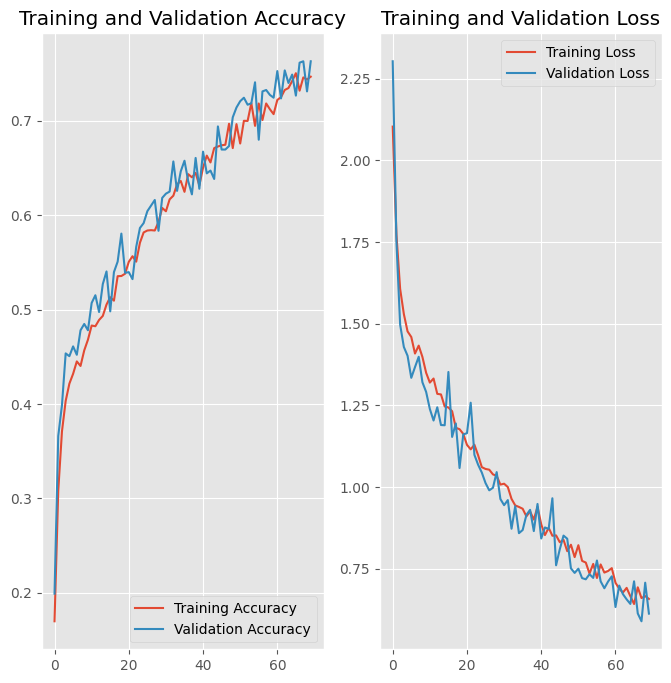

In [83]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Summary of Findings**




- Model 1 - this model was predominantly to observe the performance of the base architecture on the original training datatset. While the model was somewhat able to learn, achieving a loss of 1.0 and 60% accuracy on the training set, the validation loss and accuracy did not track indicating that the model was memorising the training set and not identifying any real patterns.

- Model 2 = takes 2 steps to handle overfitting. They are data augmentation and dropouts. Each training image was passed through a preprocessing layer where the image would be flipped, rotated, zoomed and translated randomly in an effort to add some diveristy to the inputs. Additionally, before the flattening layer, a dropout of 0.5 was used. These two changes to data and CNN structure resulted in overfitting being diminished greatly, however, the model's loss and accuracy suffering - 0.5 accuracy and 1.3 loss for both training and validation sets.

- Model 3 - with overfitting handled, now there was a need to rebalance the classes since some classes had higher representation than others. After adding an additional 500 images per class and after many experiments with the position(s) of batch normalisation layer, 5 such layers were added to normalise the output of each hidden layer. These changes to data and CNN architecture, did not yield improved results compared to the previous models. The assumption was made that batch normalisation, in this case, casued the model to struggle to learn from the training set so on each epoach the validation loss and accuracy would swing wildly. While its trend was decreasing and increases respectively, these huges swings would mean the model is likely unstable in real world scenarios.

- Model 4 - though, it was not neccessary, I opted to run model 2 again but with the fully augmented and rebalanced dataset. The result was much improved performance, both training and validation losses tracked very closely together with the model, after 70 epochs, yielding a validation loss of 0.65 and 76% accuracy. It is likely that with a more optimised architecture, this model could yield substantially improved results with magnitudes fewer parameters than other models for the same or similar tasks.

- Model 5 - this was an experiment to see the effect of another fully connected layers before the output layer and softmax. The idea was to show how Convolutional Layers learn the features and the fully connected layers then better map said features to the correct classes. The result was a model with 200K more parameters than model 4 but performed almost equally as well. It indicates that the convolutional layers did learn the primary features of the classes but a single dense layer was not necessarily enough to better classify the convolution outputs.



Should one, consider approaching this problem again in future, I recommend better data augmentation strategies such as constrasting the lesions vs their background so they are more visible to the model. Additionally, This model likely would not perform well on persons of darker skin as all training and test set images do not include such samples.